In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [16]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [18]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
#finding all column names through inspector which was imported above
inspector = inspect(engine)
mea_columns = inspector.get_columns('measurement')
for column in mea_columns:
    print(column['name'])

id
station
date
prcp
tobs


In [22]:
sta_columns = inspector.get_columns('station')
for column in sta_columns:
    print(column['name'])

id
station
name
latitude
longitude
elevation


In [31]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent

('2017-08-23',)

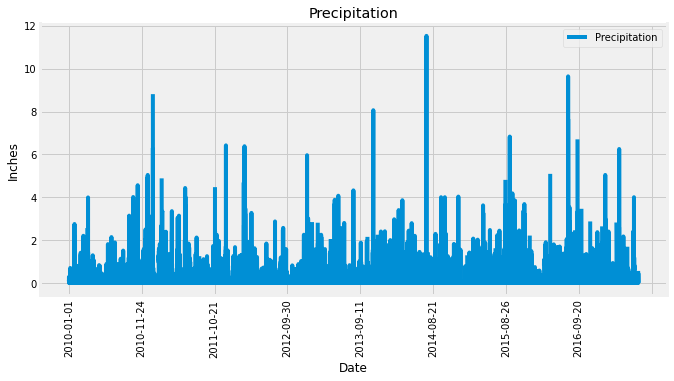

In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
twelve_month_precipitation = session.query(measurement.date,measurement.prcp).filter(measurement.date >= (dt.date(2017,8,23) - dt.timedelta(days=365))).order_by(measurement.date).all()
    #twelve_month_precipitation

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)
    #one_year
# Perform a query to retrieve the data and precipitation scores
prec_scores = session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).all()
    #prec_scores

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df = pd.DataFrame(prec_scores, columns = ['Date','Precipitation'])
prec_df.set_index('Date', inplace = True)
prec_df.head()

# Sort the dataframe by date
prec_df = prec_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
prec_df.plot(title='Precipitation',figsize=(10,5))
plt.legend(loc='upper right')
plt.xticks(rotation = 90)
plt.ylabel('Inches')
plt.savefig('Images/precipitation.png')
plt.show()


In [56]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe()

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [57]:
# Design a query to calculate the total number stations in the dataset
session.query(measurement.station).distinct().count()

9

In [58]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#most active station = USC00519281
#create list of low/high temp and average by id (tobs)
l = [func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)]
#query
low_high_avg = session.query(*l).filter(measurement.station == 'USC00519281').all()
low_high_avg

[(54.0, 85.0, 71.66378066378067)]

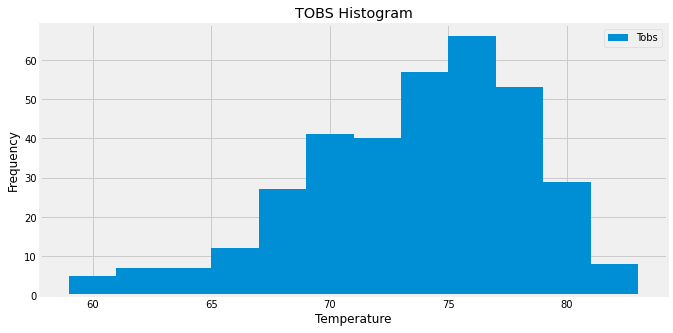

In [65]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_last_twelve = session.query(measurement.tobs).filter(measurement.date >= one_year).filter(measurement.station == 'USC00519281').order_by(measurement.date).all()
    #tobs_last_twelve
#turn into df to plot
tobs_df = pd.DataFrame(tobs_last_twelve, columns = ['Tobs'])
#plot
tobs_df.plot.hist(bins=12, title = 'TOBS Histogram',figsize = (10,5))
plt.xlabel('Temperature')
plt.savefig('Images/tobs_histogram.png')
plt.show()

# Close session

In [66]:
# Close Session
session.close()